# Questions we would like to answer: 
1.How did infant deaths change during 2000-2015? 
2.How do alcohol and HIV/AIDS affect adult mortality? 
3.Which factors influence life expectancy the most (positively and negatively)? 

# Import libraries

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Import dataset

In [188]:
df = pd.read_csv("/Users/rasastulginskiene/Desktop/IT/Regression/life_expectancy_data.csv")

In [189]:
pwd

'/Users/rasastulginskiene'

In [152]:
#df.columns = df.columns.str.replace(' ', '_')

In [190]:
df.rename(columns=str.lower).head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [191]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [192]:
df.shape

(2938, 22)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [195]:
df.drop('Diphteria', axis=0, inplace=True)

KeyError: "['Diphteria'] not found in axis"

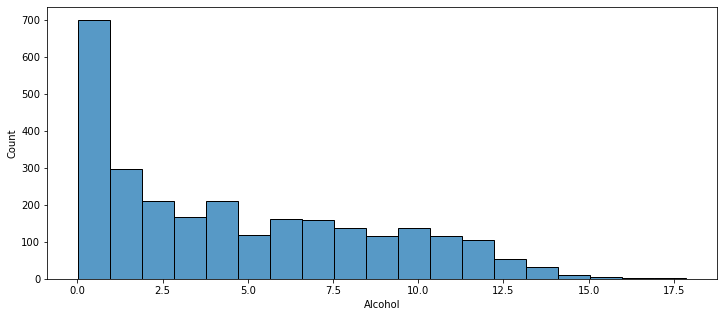

In [100]:
plt.figure(figsize=(12,5))
plt.tight_layout()
sns.histplot(df['Alcohol'])
plt.show()
#plot_hist(data_df['Alcohol'])

In [103]:
features = ['Year','Life expectancy','Adult Mortality','infant deaths','alcohol','percentage expenditure',
            'Hepatitis B', 'Measles','BMI','under-five deaths','Polio','Total expenditure',
            'Diphtheria','HIV/AIDS', 'GDP','Population', 'Schooling']

def corr_plot(mat, title='My Title', color='cividis'):
    plt.subplots(figsize=(14, 11))
    plt.title(title,fontsize=22)

    sns.heatmap(mat,linewidths=0.2,vmax=0.7,square=True,cmap=color, 
                linecolor='w',annot=True,annot_kws={'size':9},cbar_kws={'shrink': .5})

In [104]:
corr_matrix = df[features].corr()

KeyError: "['Life expectancy', 'alcohol', 'Measles', 'BMI', 'under-five deaths', 'Diphtheria', 'HIV/AIDS'] not in index"

Define x and y

In [66]:
x = data_df.drop(['Year'], axis=1).values
y = data_df['Alcohol'].values

In [67]:
print(x)

[['Afghanistan' 'Developing' 65.0 ... 17.3 0.479 10.1]
 ['Afghanistan' 'Developing' 59.9 ... 17.5 0.476 10.0]
 ['Afghanistan' 'Developing' 59.9 ... 17.7 0.47 9.9]
 ...
 ['Zimbabwe' 'Developing' 44.8 ... 1.3 0.427 10.0]
 ['Zimbabwe' 'Developing' 45.3 ... 1.7 0.427 9.8]
 ['Zimbabwe' 'Developing' 46.0 ... 11.2 0.434 9.8]]


In [68]:
print(y)

[0.01 0.01 0.01 ... 4.43 1.72 1.68]


Split the dataset in training set and test set

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.33, random_state=42) # from sklearn model

Train the model on the training set


In [70]:
from sklearn.linear_model import LinearRegression  #Nepavyko, nes stringo neskaito
ml = LinearRegression()
ml.fit(x_train,y_train)

ValueError: could not convert string to float: 'Seychelles'

Predict the test set results

In [71]:
y_pred = ml.predict(x_test) #nekviecia, nes fit nera
print(y_pred)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
ml.predict([[value]])

Evaluate the model

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

Plot the results

In [ ]:
import matplotlib.pyplot as plt
plt.figure(fisize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

Predicted values

In [ ]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]